### Finite difference methods (FDM) for partial differential equations (PDE)

Main references

[^1]: Timothy Sauer (2017) *Numerical Analysis* 3rd Edition. (p. 348)

#### Take-aways

After studying this chapter, we will be able to

TBF



##### Common settings/Notation

| symbol | meaning |
|---|---|
| $k$ | time step size |
| $h$ | spatial grid spacing |
| $x_i$ | spatial grid point $x_i = a + ih$ |
| $t_j$ | time grid point $t_j = a + jk$ |
| $u(x_i, t_j)$ | true solution evaluated at $(x_i, t_j)$ |
| $w_{i, j}$ | numerical solution meant to approximate $u(x_i, t_j)$ |


#### Finite difference method for hyperbolic equations



##### Problem (Wave equation)


**Problem of interest** (Wave equation)

Given $f,g:(a,b)\to \mathbb{R}$ and $l,r:[0,\infty)\to{\mathbb{R} }$, find $u:[a,b]\times[0,\infty) \to \mathbb{R}$ that satisfies
$$
\left\{\begin{array}{l}
u_{tt} = c^2 u_{xx} \\
u(x, 0)=f(x) \text { for all } a \leq x \leq b \\
u_t(x, 0)=g(x) \text { for all } a \leq x \leq b \\
u(a, t)=l(t) \text { for all } t \geq 0 \\
u(b, t)=r(t) \text { for all } t \geq 0
\end{array}\right.
$$

**Remark** (Basic intuition of wave equation)

- $u_t$ is not the speed of the wave. It is the time derivative of the amplitude of the wave. 
- d'Alembert's formula gives the sense of why $c$ is the speed of the wave.
  - d'Alembert's formula gives the analytic solution for certain initial and boundary condition. (See Wikipedia page for details.)
  
  $$
  u(x, t)=\frac{1}{2}[f(x-c t)+f(x+c t)]+\frac{1}{2 c} \int_{x-c t}^{x+c t} g(\xi) d \xi
  $$ 
  - But the domain of the PDE that d'Alembert's formula gives answer to is $[0,\infty)\times(-\infty,\infty)$. 
  - In fact, a finite spatial domain is harder to answer analytically since we need to incorporate how the waves bounce off of the boundaries.


![animation of 1D wave equation](https://upload.wikimedia.org/wikipedia/commons/1/1f/Wave_equation_1D_fixed_endpoints.gif)

Figure: Animation of 1D wave equation (source - Wikipedia)

##### Finite Difference Method

**Remark** 

- "Forward" or "Backward" method does not make sense for the wave equation. 
- We only have 2nd order partial derivatives.

**Centered different quotient for 2nd derivative**

$$
u_{tt}(x_i, t_j)\approx \frac{w_{i, j+1}-2 w_{i j}+w_{i, j-1}}{k^2}
$$

$$
u_{xx}(x_i, t_j)\approx \frac{w_{i+1, j}-2 w_{i j}+w_{i-1, j}}{h^2}
$$

**Numerical scheme**

Replace $u_{tt}$ and $u_{xx}$, then the wave equations $u_{tt} = c^2 u_{xx}$ reads:

$$
\frac{w_{i, j+1}-2 w_{i j}+w_{i, j-1}}{k^2}-c^2 \frac{w_{i-1, j}-2 w_{i j}+w_{i+1, j}}{h^2}=0
$$

Rearranging:

$$
w_{i, j+1}=\left(2-2 \sigma^2\right) w_{i j}+\sigma^2 w_{i-1, j}+\sigma^2 w_{i+1, j}-w_{i, j-1},
$$

where $\sigma=ck/h$.

**Stencil** (FDM for wave equation)


![Stencil of FDM for wave equation](https://www.researchgate.net/profile/Muhammad-Ajaib-2/publication/235696971/figure/fig1/AS:359776686620680@1462788855055/Stencil-for-the-FDM-of-the-1-D-wave-equation-It-represents-the-expression-given-in.png)

Figure: ResearchGate - Muhammand Adeel Ajaib 

The figure uses different index from us. Substitute:

- $n\gets j$
- $j\gets i$

**Centered difference quotient for 1st time step**

- The numerical scheme requires data from two previous time steps. 
- We need to use initial velocity to determine the first time step, not the FDM.

$$
u_t\left(x_i, t_j\right) \approx \frac{w_{i, j+1}-w_{i, j-1}}{2 k}
$$


(FDM stencil; originally for elliptic problem, but it has the same stencil for the wave equation)


| | |
|---|---|
| ![Stencil of FDM for Poisson equation 1](https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/15BVPs/elliptic/dd01.png) | ![Stencil of FDM for Poisson equation 1](https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/15BVPs/elliptic/dd02.png) |


Figure: Department of Electrical and Computer Engineering, University of Waterloo 



In conjunction withwith the initial velocity, we have

$$
g(x_i)=u_t\left(x_i, t_0\right) \approx \frac{w_{i, 1}-w_{i, -1}}{2 k}.
$$

**Remark** (Constructing finite difference method)

- 1st time step
  - To keep 2nd order accuracy, we use centered-difference quotient when incorporating $u_t$ from the initial data.
  - This introduces a negative time index $w_{i,-1}$. However, this can be resolved by combining (a) the initial data and (b) finite difference formula for time marching ($j=0$). Below are the details.
  - Though this may look unphysical (involvement of negative time), there is no problem from the degrees of freedom point of view: use right amount of information to specify right amount of unknowns. 

Plug $w_{i, -1}= w_{i, 1} - {2 k}g(x_i)$ into 

$w_{i, 1}=\left(2-2 \sigma^2\right) w_{i, 0}+\sigma^2 w_{i-1, 0}+\sigma^2 w_{i+1, 0}-w_{i, -1}$, 

then we have 

$w_{i 1}=\left(2-2 \sigma^2\right) w_{i 0}+\sigma^2 w_{i-1,0}+\sigma^2 w_{i+1,0}-w_{i 1}+2 k g\left(x_i\right)$, 

and futher solve for $w_{i1}$ to arrive at 

$$
w_{i 1}=\left(1-\sigma^2\right) w_{i 0}+k g\left(x_i\right)+\frac{\sigma^2}{2}\left(w_{i-1,0}+w_{i+1,0}\right)
$$

With the initial ($j=0$) and first ($j=1$) time steps available, we can now write the numerical scheme.

- Matrix form:

Put 

$$
A=\left[\begin{array}{ccccc}
2-2 \sigma^2 & \sigma^2 & 0 & \cdots & 0 \\
\sigma^2 & 2-2 \sigma^2 & \sigma^2 & \ddots & \vdots \\
0 & \sigma^2 & 2-2 \sigma^2 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \sigma^2 \\
0 & \cdots & 0 & \sigma^2 & 2-2 \sigma^2
\end{array}\right]
$$

Then, the computation of the first time step reads:

$
\left[\begin{array}{c}
w_{11} \\
\vdots \\
w_{m 1}
\end{array}\right]=\frac{1}{2} A\left[\begin{array}{c}
w_{10} \\
\vdots \\
w_{m 0}
\end{array}\right]+k\left[\begin{array}{c}
g\left(x_1\right) \\
\vdots \\
g\left(x_m\right)
\end{array}\right]+\frac{1}{2} \sigma^2\left[\begin{array}{c}
w_{00} \\
0 \\
\vdots \\
0 \\
w_{m+1,0}
\end{array}\right]
$


**Remark** (Dimensions)

- Watch the dimensions of the vectors. In particular, the lenth last vector is $m$ with 0's in the middle (only $m-2$ of them). The same is true for similar vectors in the following. (Remember the matrix form comes from plugging in $i=1,2,\cdots,m$ and the best way to see this is to conduct concrete calculations with small size, say $m=3$.)
  - $w_{i,0}$ terms ($i=1,2,\cdots,m$) have gotted lumped into the term involving $(1/2)A$, hence only zeros left in the last vector term.


Or, setting $[w_{10}, \cdots, w_{m0}]^T = [f(x_{1}), \cdots, f(x_{m})]^T$, we can write in the most explicit way:

$$
\left[\begin{array}{c}
w_{11} \\
\vdots \\
w_{m 1}
\end{array}\right]=\frac{1}{2} A\left[\begin{array}{c}
f(x_{1}) \\
\vdots \\
f(x_{m})
\end{array}\right]+k\left[\begin{array}{c}
g\left(x_1\right) \\
\vdots \\
g\left(x_m\right)
\end{array}\right]+\frac{1}{2} \sigma^2\left[\begin{array}{c}
w_{00} \\
0 \\
\vdots \\
0 \\
w_{m+1,0}
\end{array}\right]
$$


And from then on, we compute

$$
\left[\begin{array}{c}
w_{1, j+1} \\
\vdots \\
w_{m, j+1}
\end{array}\right]=A\left[\begin{array}{c}
w_{1 j} \\
\vdots \\
w_{m j}
\end{array}\right]-\left[\begin{array}{c}
w_{1, j-1} \\
\vdots \\
w_{m, j-1}
\end{array}\right]+\sigma^2\left[\begin{array}{c}
w_{0 j} \\
0 \\
\vdots \\
0 \\
w_{m+1, j}
\end{array}\right]
$$

##### Computation


**Example** (Wave equation)

Compute the numerical solution of 

$$
\left\{\begin{array}{l}
u_{tt} = c^2 u_{xx} \\
u(x, 0)= f(x) \text { for all } a \leq x \leq b \\
u_t(x, 0) = g(x) \text { for all } a \leq x \leq b \\
u(a, t)=l(t) \text { for all } t \geq 0 \\
u(b, t)=r(t) \text { for all } t \geq 0
\end{array}\right.
$$

where $a=0$, $b=1$, $c=2$, $f(x) = \sin(\pi x)$, and $g(x)=l(t)=r(t)=0$.

In [12]:
import numpy as np
from internallib import tridiag
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

def FDM_wave(w_pre, par):
    """
    Return the next time iterate of the wave equation using finite difference method.
    
    Input:
        w_pre: (2D array) State vectors of two prior times (spatial_dim-by-2). 
            w_pre[:, 0] is the state at the previous time, and 
            w_pre[:, 1] is the state at the current time.
        par: (dict) Parameter for the finite difference method.
    Output:
        w_new: (1D array) State vector of next time.
    """
    s = par['c']*par['k']/(par['h'])
    N = par['N']    # Number of spatial grid excluding boundary
    k = par['k']    # Time step
    x = par['x']    # Spatial grid
    t = par['t']    # Time grid
    j = par['j']    # Current time index (center of the stencil; start from 0)

    l = par['l']    # Boundary condition at left (lambda fn)
    r = par['r']    # Boundary condition at right (lambda fn)
    f = par['f']    # Initial distribution condition (lambda fn)
    g = par['g']    # Initial velocity condition (lambda fn)

    # Initialize arrays
    #   Note: watch the dimension of the arrays
    #       b_vec only concerns the interior points
    #       w_new stores things for the entire spatial domain 
    w_new = np.zeros(N+2)
    b_vec = np.zeros(N) # name: vector coming from boundary

    # Construct the wave equation matrix
    A = tridiag(s*s, 2.-2.*s*s, s*s, N)
    # Construct the vector coming from boundary:
    #    w_pre[0, 1] corresponds to w_{0, j} in math notation
    b_vec[0] = l(t[j])
    b_vec[-1] = r(t[j])

    # Main time marching loop
    if j == 0:
        w_new[1:-1] = 0.5*A@f(x[1:-1]) + k*g(x[1:-1]) + 0.5*s*s*b_vec
    else:
        w_new[1:-1] = A@w_pre[1:-1, 1] - w_pre[1:-1, 0] + s*s*b_vec

    # fill in the boundary condition
    w_new[0] = l(t[j+1])
    w_new[-1] = r(t[j+1])
    
    return w_new


In [2]:

def solve_wave_eq(ic, iv, l, r, c, a, b, T, N, K, t0=0.):
    """
    Return numerical solution of Heat equation using forward difference method.
    
    Input:
        ic: (function) Initial temperature distribution.
        iv: (function) Initial velocity distribution.
        l: (function) Left boundary condition.
        r: (function) right boundary condition.
        c: (float) wave propagation speed.
        a: (float) Left boundary.
        b: (float) Right boundary.
        T: (float) Final time.
        N: (int) Number of spatial grid points.
        K: (int) Number of time grid points.
        t0: (float) Initial time. (default=0.)
    Output:
        w: (2D array) Numerical solution.
    """
    w = np.zeros((N+2, K+1))
    h = (b-a)/(N+1)
    k = (T-t0)/K

    x = np.linspace(a, b, N+2)
    t = np.linspace(t0, T, K+1)

    par = {'c': c, 
           'l': l, 'r': r, 'f': ic, 'g': iv,
           'N': N, 'K': K, 'h': h, 'k': k, 
           'x': x, 't': t, 
           }

    # initial condition
    w[:, 0] = ic(x)

    # time marching
    for j in range(K):
        par['j'] = j
        #   Note: recall that slicing by a list preserves the dimension
        if j == 0:
            w[:, j+1] = FDM_wave(w[:, j], par=par)
        else:
            w[:, j+1] = FDM_wave(w[:, [j-1, j]], par=par)
    
    return w, x, t

**Problem settings**

- To see nice results, set:
  - `K = 40` or lower while `N = 20` and `T = 1.`.
  - Or any settings that CFL condition is met. (See below)
- To see stability issues set:
  - `K = 37` or lower while `N = 20` and at least `T = 1.`

In [22]:
N = 20
K = 100
a = 0.
b = 1.
c = 2.
T = 1.
ic = lambda x: np.sin(np.pi*x)
iv = lambda x: 0.
l = lambda t: 0.
r = lambda t: 0.

# Try:  T = 0.05 or bigger to see stability issue, 
#       T = 0.03 for stable solution
w, x, t = solve_wave_eq(ic=ic, iv=iv, l=l, r=r, c=c, a=a, b=b, T=T, N=N, K=K)

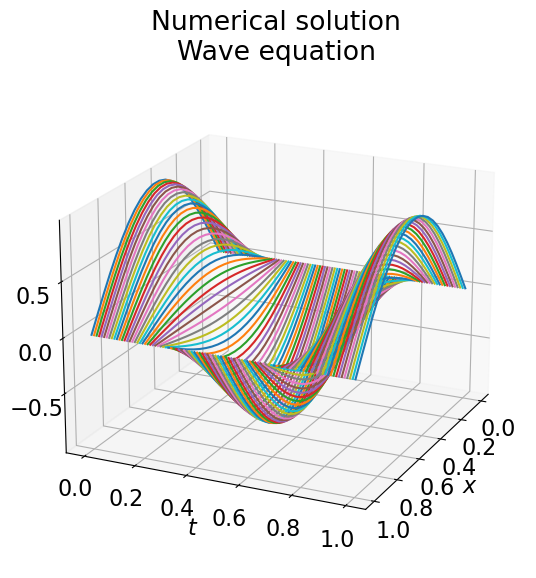

In [23]:
#%% plot
fig, ax = plt.subplots(1,1, figsize=(6.5, 6.5), subplot_kw={'projection':'3d'})

for j in range(K+1):
    ax.plot(x, t[j]*np.ones(N+2), w[:, j], label='Numerical')
    ax.set_title('Numerical solution\nWave equation')


# Change the angle of projection

ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.view_init(elev=20, azim=25)

plt.show()



##### Stability


**Theorem** (CFL condition)

The Finite Difference Method applied to the wave equation with wave speed $c > 0$ is
stable if $\sigma = ck/h ≤ 1$.

###### proof


**Proof** (toggle)

The main iterations read:

$$
w_{j+1}=A w_j-w_{j-1}+\sigma^2 s_j,
$$

where $s_j=\sigma^2[w_{0 j}, 0,\cdots, 0, w_{m+1, j}]^T$ represents the vector coming from boundary conditions. 



In (block) matrix form, this reads:

$$
\left[\begin{array}{c}
w_{j+1} \\
w_j
\end{array}\right]=\left[\begin{array}{rr}
A & -I \\
I & 0
\end{array}\right]\left[\begin{array}{c}
w_j \\
w_{j-1}
\end{array}\right]+\sigma^2\left[\begin{array}{l}
s_j \\
0
\end{array}\right]
$$





Errors will not magnfy if the eigenvalues of the following $2m$-by-$2m$ matrix is less than 1 in absolute value:

$$
A^{\prime}=\left[\begin{array}{rr}
A & -I \\
I & 0
\end{array}\right]
$$

$(\lambda, [\vec{y}^T, \vec{z}^T]^T)$ be eigenpair of $A'$ if and only if

$$
A^{\prime}
\begin{bmatrix}
\vec{y} \\
 \vec{z}
\end{bmatrix}
=
\left[\begin{array}{rr}
A & -I \\
I & 0
\end{array}\right]
\begin{bmatrix}
\vec{y} \\
 \vec{z}
\end{bmatrix}
= 
\begin{bmatrix}
A\vec{y} -  \vec{z}\\
 \vec{y}
\end{bmatrix}
= 
\lambda
\begin{bmatrix}
\vec{y}\\
 \vec{z}
\end{bmatrix}
$$

if and only if

$$
\begin{aligned}
\lambda y & =A y-z \\
\lambda z & =y
\end{aligned}
$$

Plugging one into the other,

$$
A y=\left(\frac{1}{\lambda}+\lambda\right) y
$$

To sum up, if $A'$ ever has an eigenvalue $\lambda$, then it must satisfy $\mu=1/\lambda +\lambda$, where $\mu$ is eigenvalues of $A$.


Recall the theorems: 

> - Eigenvalues of `tridiag(-1, 2, -1)`: $0 < \lambda_j < 4$.
> - $\lambda$ is an eigenvalue of $A$ iff $a+b\lambda$ is an eigenvalue of $aI+bA$. (And their eigenvectors are the same.)


It is not hard to show that $\mu$'s are all real numbers and

$$
2-4\sigma^2 < \mu < 2.
$$

If $\sigma \le 1$, then 

$$
\begin{split}
&\mu=\frac{1}{\lambda} + \lambda \in\mathbb{R}, \quad \text{and}
\\
&-2 < \mu < 2.
\end{split}
$$

These two condition imples $|\lambda| = 1$, hence the desired stability. (This is a homework problem.)

[Q.E.D.]

**Remark** (stability of wave equation)

- Notice the trick that when a numerical update involves past two steps of history, we may consider stacking two sets to make higher dimensional problem. This is reminescent of converting 2nd order ODE to vector form of 1st order ODE.
- The above condition is called *CFL condition* for the wave equation after R. Courant, K. Friedrichs, and H. Lewy
- It says "the distance traveled by the wave ($ck$) in unit time must not exceed the spatial spacing $h$." 
- The theorem says that the CFL condition is a sufficient condition for stability in the wave equation. However, this is not true for more general hyperbolic equations. ( Sauer (2017) p. 417 )
  - This is just a matter of terminology. And the important thing is what condition guarantees stability of the method and people want to address stability when they speak of CFL conditions.

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)